In [ ]:
!pip install psycopg2

In [ ]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.power import TTestIndPower

In [5]:
import os
os. getcwd()

'/content'

In [6]:
import sqlite3
import pandas as pd
# Create your connection.
conn = sqlite3.connect('./drive/MyDrive/database.sqlite')

In [14]:
countries_df = pd.read_sql_query("SELECT * FROM Country", conn)
countries_df.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [15]:
league_data = pd.read_sql_query("SELECT * FROM League", conn)
league_data.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [23]:
match_df = pd.read_sql_query("SELECT * FROM Match", conn)
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [17]:
player_attrib_data = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
player_attrib_data.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [52]:
team_df = pd.read_sql_query("SELECT * FROM Team", conn)
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [19]:
team_attrib_data = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)
team_attrib_data.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [20]:
player_df = pd.read_sql_query("SELECT * FROM Player", conn)
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


Hyp test 1

In [25]:
#create new columns home_team_win & away_team win with binary values as such:
#Home team winning = 1, Tie=0, Away team winning = 0
match_df['home_team_win'] = np.zeros
match_df['away_team_win'] = np.zeros

In [ ]:
#WIN
match_df['home_team_win'].loc[match_df['home_team_goal'] > match_df['away_team_goal']] = 1
#LOSS
match_df['home_team_win'].loc[match_df['home_team_goal'] < match_df['away_team_goal']] = 0
#TIE
match_df['home_team_win'].loc[match_df['home_team_goal'] == match_df['away_team_goal']] = 0

#WIN
match_df['away_team_win'].loc[match_df['home_team_goal'] < match_df['away_team_goal']] = 1
#LOSS
match_df['away_team_win'].loc[match_df['home_team_goal'] > match_df['away_team_goal']] = 0
#TIE
match_df['away_team_win'].loc[match_df['home_team_goal'] == match_df['away_team_goal']] = 0

In [28]:
#the means of each array represent the win rate: win rate = matches won / matches NOT won (tie or loss)
x_bar_home = np.mean(np.array(match_df['home_team_win']))
x_bar_away = np.mean(np.array(match_df['away_team_win']))

#calculate the difference between the means, using all rows in the dataset
diff = x_bar_home - x_bar_away
diff

0.17133069017283187

In [30]:
home_team_win_array = np.array(match_df['home_team_win'])
away_team_win_array = np.array(match_df['away_team_win'])

## Cohen's d: Effect Size

Cohen's d is a statistical measure of the effect size between two groups. It is calculated by dividing the difference between the means of the two groups by the pooled standard deviation. The pooled standard deviation is a measure of the average variability of the data in both groups.

In [33]:
# calculate mean of two groups

n_home = len(home_team_win_array)

n_away = len(away_team_win_array)

home_wins = sum(home_team_win_array)
away_wins = sum(away_team_win_array)

home_win_rate_mean = home_wins/n_home
away_win_rate_mean = away_wins/n_home

In [35]:
# calculate difference between means of the two groups

diff = home_win_rate_mean - away_win_rate_mean

In [36]:
# calculate pooled variance and pooled standard deviation

var_home = home_team_win_array.var()
var_away = away_team_win_array.var()

pooled_var = (n_home * var_home + n_away * var_away) / (n_home + n_away)
pooled_std = np.sqrt(pooled_var)

In [37]:
# calculate cohens_d as (difference between means of the two groups) / pooled_std

cohens_d = (diff) / pooled_std
cohens_d

0.35996267005444466

Effect size is a measure of the strength of the relationship between two variables. A higher effect size indicates a stronger relationship, while a lower effect size indicates a weaker relationship.

Cohen's d is typically interpreted using the following guidelines:

- d = 0.2: Small effect size
- d = 0.5: Medium effect size
- d = 0.8: Large effect size

A higher effect size indicates that the difference between the two groups is more pronounced. This means that the results of the study are more likely to be statistically significant and that the findings are more likely to be meaningful in the real world.

## Power Analysis

Power analysis is a statistical method that is used to determine the sample size needed for a study to detect a specific effect size with a desired level of confidence.

The power of a study is affected by three factors:

- The effect size: Read above - Cohen's d


- The significance level (alpha): The significance level is the probability of rejecting the null hypothesis when it is actually true. A lower significance level indicates that you are more confident that the difference you are seeing is real. However, it also means that you are less likely to detect a real difference. A lower significance level will require a larger sample size to detect a difference.


- The power: The power is the probability of rejecting the null hypothesis when it is false. A higher power will require a larger sample size to detect a difference.


In [38]:
# Initialize parameters
effect = cohens_d
alpha = 0.05
power = 0.95
# sample 2 / sample 1
ratio = len(away_team_win_array) / len(home_team_win_array)
# Perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None,ratio=ratio, alpha=alpha)
print(f"The minimum sample size: {result}")

The minimum sample size: 201.54273761658945


In [41]:
print(f"We have a sample size of: {len(away_team_win_array)}")

We have a sample size of: 25979


#### Using Bootstrapping to sample from the ~25K matches, specifying # of iterations & sample size of each iteration

In [46]:
sample_means_home = []
for _ in range(1000):
    sample_mean = np.random.choice(home_team_win_array,size=202).mean()
    sample_means_home.append(sample_mean)
len(sample_means_home)

sample_means_away = []
for _ in range(1000):
    sample_mean = np.random.choice(away_team_win_array,size=202).mean()
    sample_means_away.append(sample_mean)
len(sample_means_away)

1000

In [44]:
# helper functions

def calc_variance(sample):
    '''Computes the variance a list of values'''
    sample_mean = np.mean(sample)
    return sum([(i - sample_mean)**2 for i in sample])

def calc_sample_variance(sample1, sample2):
    '''Computes the pooled variance 2 lists of values, using the calc_variance function'''
    n_1, n_2 = len(sample1), len(sample2)
    var1, var2 = calc_variance(sample1), calc_variance(sample2)
    return (var1 + var2) / ((n_1 + n_2) - 2)

def calc_twosample_tstatistic(expr, ctrl):
    '''Computes the 2-sample T-stat of 2 lists of values, using the calc_sample_variance function'''
    expr_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    n_e, n_c = len(expr), len(ctrl)
    samp_var = calc_sample_variance(expr,ctrl)
    t = (expr_mean - ctrl_mean) / np.sqrt(samp_var * ((1/n_e)+(1/n_c)))
    return t

In [47]:
t_stat = calc_twosample_tstatistic(sample_means_home, sample_means_away)

t_stat

113.34753775268278

In [48]:
# confirm with in-built scipy function

stats.ttest_ind(sample_means_home, sample_means_away)

Ttest_indResult(statistic=113.3475377526829, pvalue=0.0)

In [50]:
## Calculate p_value manually
# Lower tail comulative density function returns area under the lower tail curve
df = len(sample_means_home)+len(sample_means_home)-2

tail = stats.t.cdf(-t_stat, df, 0, 1)

p_value = tail*2
print(p_value)

0.0


<ipython-input-49-369aca2eb80a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means_home, label='Home Win Rates') # Blue distribution
<ipython-input-49-369aca2eb80a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means_away, label='Away Win Rates') # Orange distribution


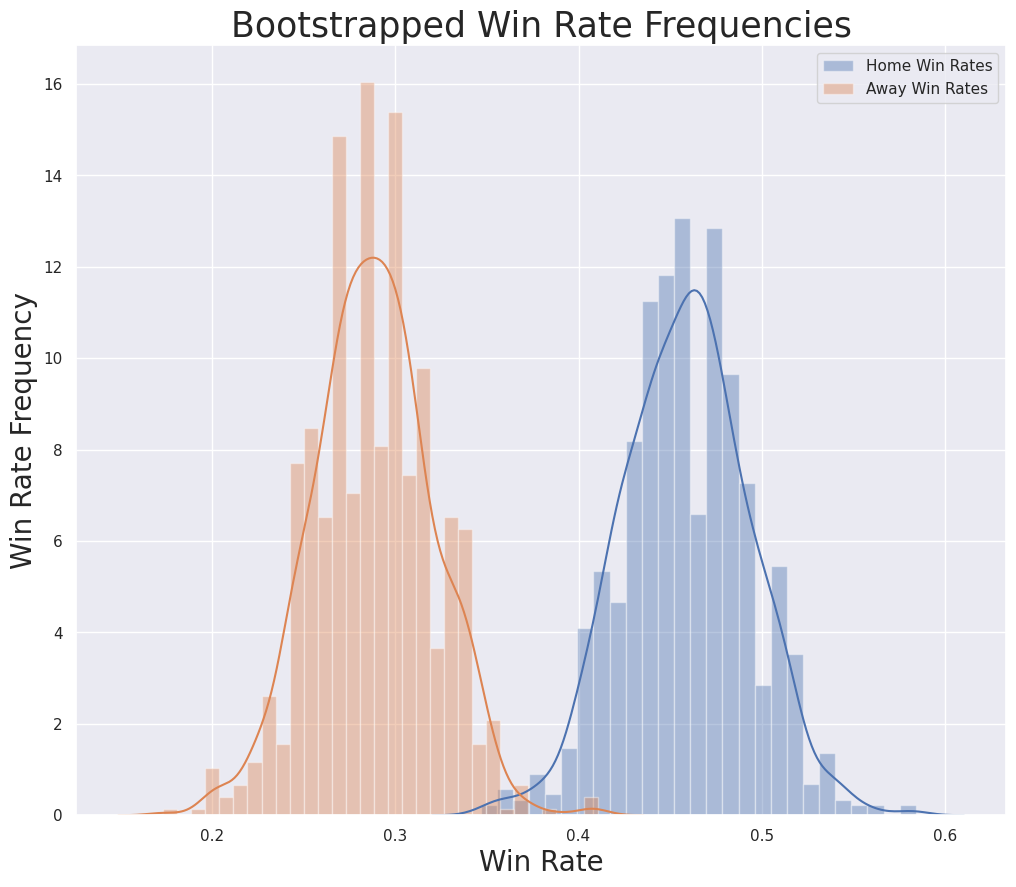

In [49]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
plt.title('Bootstrapped Win Rate Frequencies', fontsize='25')
plt.xlabel('Win Rate', fontsize='20')
plt.ylabel('Win Rate Frequency', fontsize='20')
sns.distplot(sample_means_home, label='Home Win Rates') # Blue distribution
sns.distplot(sample_means_away, label='Away Win Rates') # Orange distribution
plt.legend()
plt.show()

The p-value is lesser than 0.05, hence reject the Null Hypothesis. There is evidence within the sample to confidently reject the null hypothesis, and accept the alternative that a difference between the two means exists.

## Visualizing the Home-Field advantage

In [53]:
result = pd.merge(match_df,
                  team_df[['team_long_name','team_api_id']],
                  left_on='home_team_api_id',
                  right_on='team_api_id',
                  how='left')
result.rename(columns={"team_long_name": "home_team_name"}, inplace=True)

result = result.drop(columns='team_api_id')

results = pd.merge(result,
                  team_df[['team_long_name','team_api_id']],
                  left_on='away_team_api_id',
                  right_on='team_api_id',
                  how='left')

results.rename(columns={"team_long_name": "away_team_name"}, inplace=True)

results = results.drop(columns='team_api_id')

In [54]:
results['winning_team'] = np.nan
results['winning_team'].loc[results['home_team_goal'] > results['away_team_goal']] = results['home_team_name']
results['winning_team'].loc[results['home_team_goal'] < results['away_team_goal']] = results['away_team_name']

<ipython-input-54-3492d45eb0e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['winning_team'].loc[results['home_team_goal'] > results['away_team_goal']] = results['home_team_name']


In [55]:
home_team_win_df = results.groupby("home_team_name").agg({
        "home_team_win": "mean",
    })

home_team_win_df.sort_values(by= 'home_team_win',ascending=False)

,home_team_win
home_team_name,
FC Barcelona,0.861842
Real Madrid CF,0.848684
SL Benfica,0.822581
FC Porto,0.822581
FC Bayern Munich,0.801471
...,...
DSC Arminia Bielefeld,0.117647
AC Arles-Avignon,0.105263
Dunfermline Athletic,0.052632


In [56]:
away_team_win_df = results.groupby("away_team_name").agg({
        "away_team_win": "mean",
    })

away_team_win_df.sort_values(by= 'away_team_win',ascending=False)

,away_team_win
away_team_name,
Rangers,0.684211
FC Barcelona,0.677632
SL Benfica,0.669355
FC Porto,0.653226
Real Madrid CF,0.651316
...,...
CD Tenerife,0.052632
AC Arles-Avignon,0.052632
CD Numancia,0.052632


(0.0, 1.0)

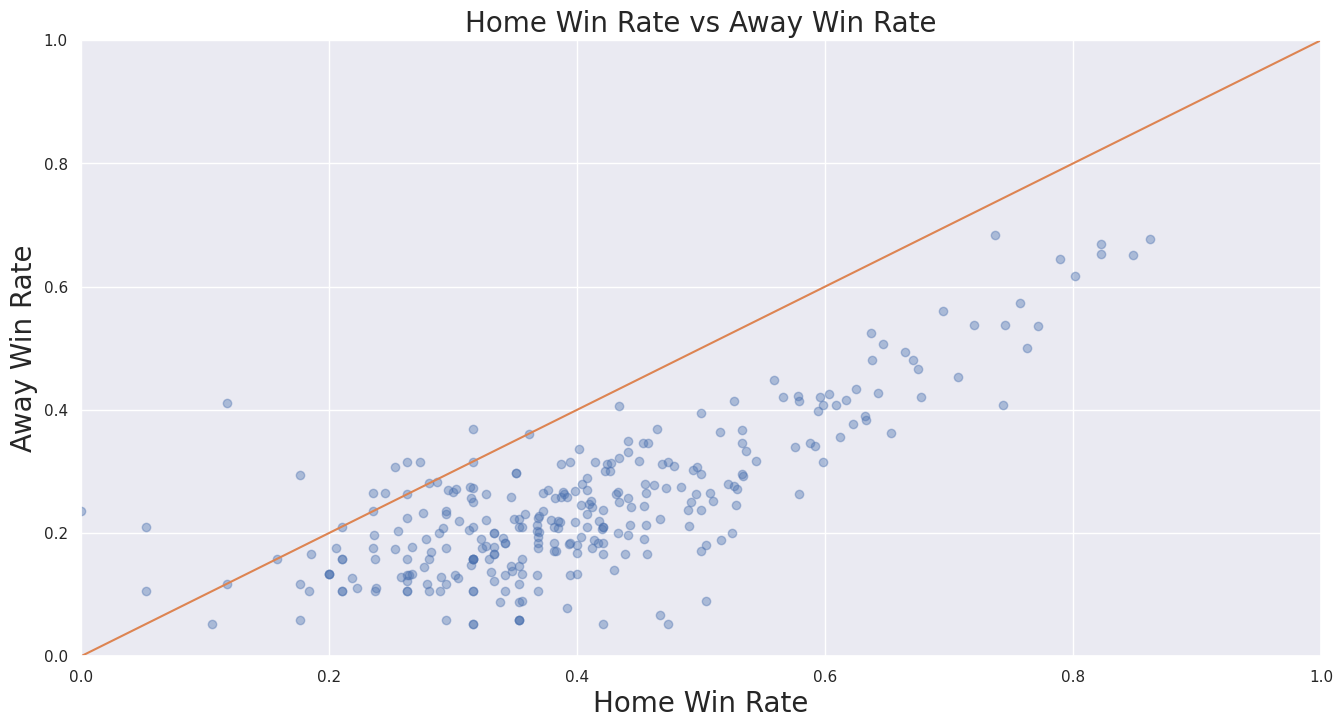

In [57]:
plt.figure(figsize=(16,8))
plt.plot(home_team_win_df,away_team_win_df,'o', alpha = 0.4)
plt.plot([0,1],[0,1])
plt.xlabel('Home Win Rate',fontsize='20')
plt.ylabel('Away Win Rate',fontsize='20')
plt.title('Home Win Rate vs Away Win Rate',fontsize='20')
plt.xlim([0,1])
plt.ylim([0,1])